In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()



In [3]:
data = females['Height']



In [4]:
low_end = 66.0
high_end = 70.0


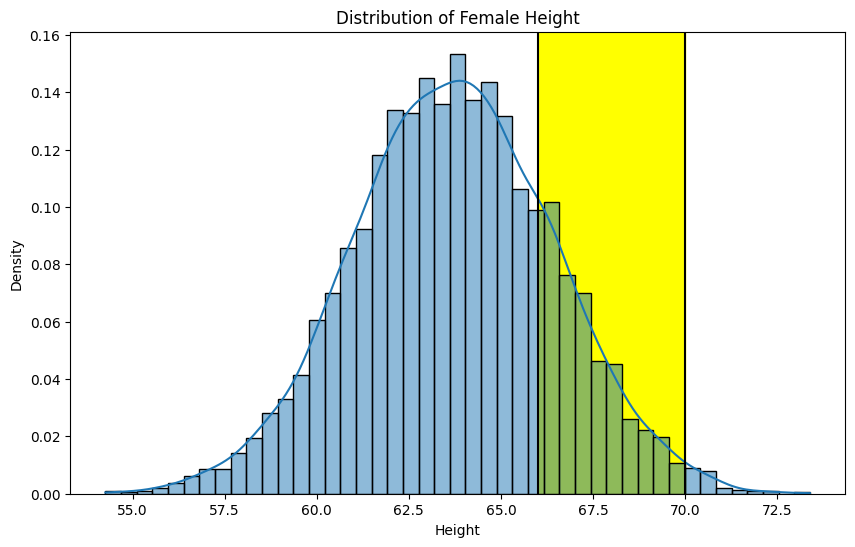

In [5]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);



In [6]:
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)



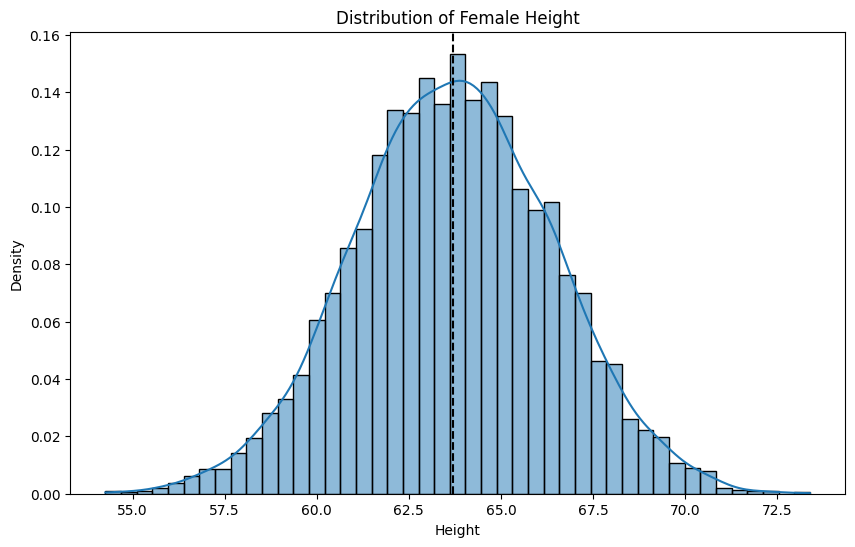

In [7]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=False)
ax.set_title('Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');



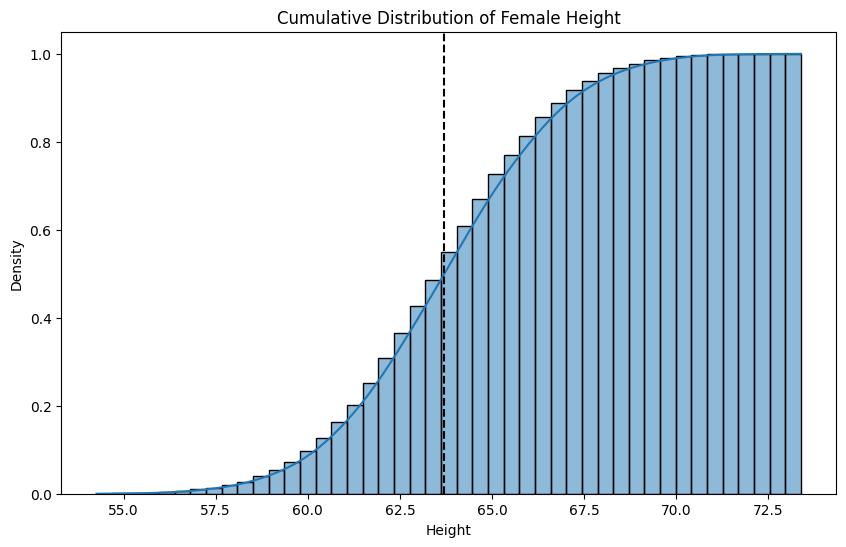

In [8]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=True)
ax.set_title('Cumulative Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');


In [9]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)


In [10]:
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)


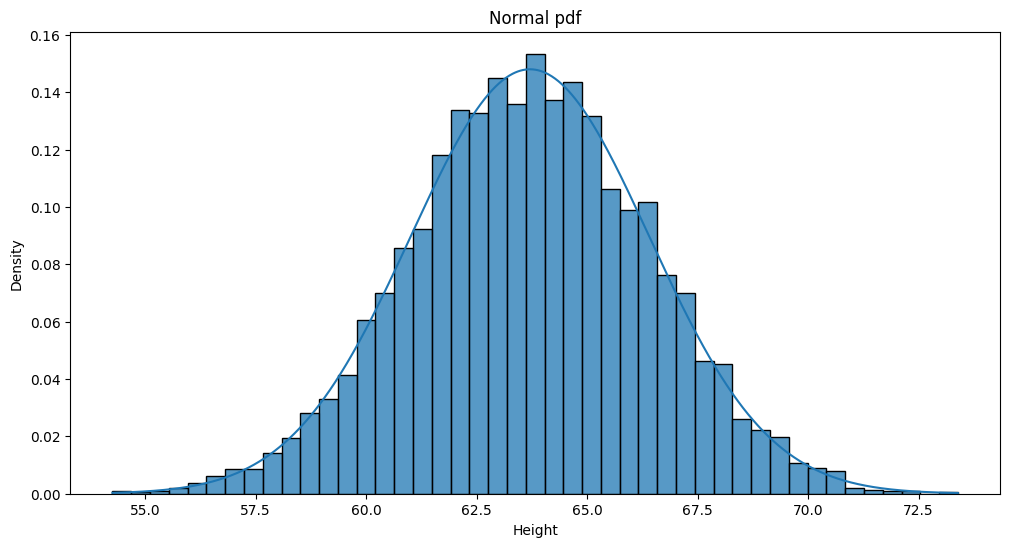

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal pdf');


In [12]:
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)



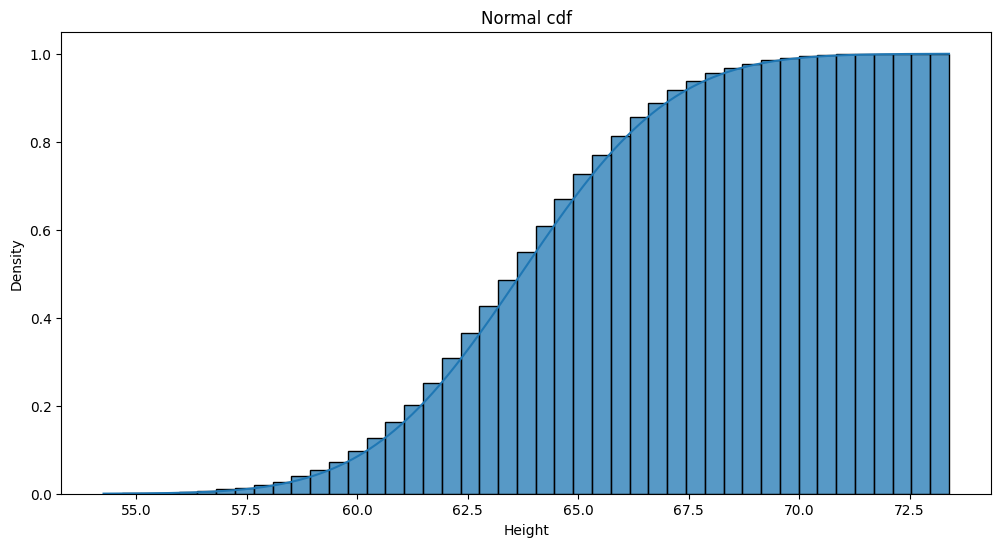

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.set_title('Normal cdf');


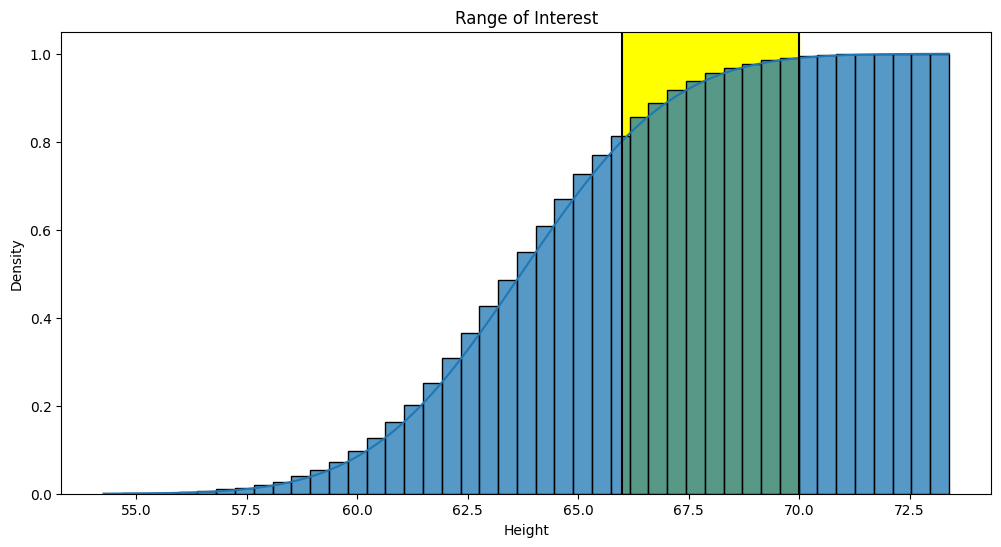

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');


In [16]:
## we subtract to find the probability of a value occurring in the range
stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)



0.1878921154347697

We found that there is a .188 probability (or a 18.8% chance) of a female having a height between 66 and 70 inches.  Behold the power of the CDF!

Probability of Less than or Greater than a Value

Instead of finding the probability of a specific range, we may instead want to know the probability of a value being less than or greater than a particular value.

For example, if we wanted to calculate the probability of the height being less than 65 inches, we don't need to subtract.

In [17]:
stats.norm.cdf(65, loc=mean,scale=std)



0.6840089832900469

If we wanted to calculate the probability of the height 65 inches or greater, we subtract from 1.

In [18]:
1 -stats.norm.cdf(65, loc=mean,scale=std)



0.3159910167099531